# Sports Project - Basket Ball

## Dataset cleaning activity

1) `Team launched` year column had improper representation andit was formatted
2) No categorical column was observed
3) Many empty cells were found and since all of them were numeric `-` is replaced with `0`

## Importing required python libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset Cleanup
### Handling missing values and understanding the data

In [2]:
# Reading data from csv
gameData = pd.read_csv('Basketball.csv')
gameData.head()

,,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,RunnerUp,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [3]:
# Shape of the dataset
gameData.shape

(61, 13)

In [4]:
## Datatype of each attribute
gameData.dtypes

                       object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
RunnerUp               object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [5]:
# Handling columns with missing values

#stores true if it is digit, else false
scoreIsDigit = pd.DataFrame(gameData.Score.str.isdigit()) 
playedGamesIsDigit = pd.DataFrame(gameData.PlayedGames.str.isdigit()) 
wonGamesIsDigit = pd.DataFrame(gameData.WonGames.str.isdigit()) 
drawnGamesIsDigit = pd.DataFrame(gameData.DrawnGames.str.isdigit()) 
lostGamesIsDigit = pd.DataFrame(gameData.LostGames.str.isdigit()) 
basketScoredIsDigit = pd.DataFrame(gameData.BasketScored.str.isdigit()) 
basketGivenIsDigit = pd.DataFrame(gameData.BasketGiven.str.isdigit()) 
tournamentChampionIsDigit = pd.DataFrame(gameData.TournamentChampion.str.isdigit()) 
runnerUpIsDigit = pd.DataFrame(gameData.RunnerUp.str.isdigit()) 



In [6]:
# Replacing missing values with 0
gameData = gameData.replace('-', 0) # dashed value
gameData = gameData.replace('?', 0) #missingvalue

#Printing last 2 rows to check if NaN replac works
gameData.tail(2)

,,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,RunnerUp,TeamLaunch,HighestPositionHeld
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955-56,15
60,Team 61,1,0,0,0,0,0,0,0,0,0,2017~18,9


In [7]:
#converting to actual types for computation - object -> numeric
gameData.Score = pd.to_numeric(gameData.Score)
gameData.PlayedGames = pd.to_numeric(gameData.PlayedGames)
gameData.WonGames = pd.to_numeric(gameData.WonGames)
gameData.DrawnGames = pd.to_numeric(gameData.DrawnGames)
gameData.LostGames = pd.to_numeric(gameData.LostGames)
gameData.BasketScored = pd.to_numeric(gameData.BasketScored)
gameData.BasketGiven = pd.to_numeric(gameData.BasketGiven)
gameData.TournamentChampion = pd.to_numeric(gameData.TournamentChampion)
gameData.RunnerUp = pd.to_numeric(gameData.RunnerUp)

In [8]:
gameData.dtypes.to_frame(name = 'Data Type')

,Data Type
,object
Tournament,int64
Score,int64
PlayedGames,int64
WonGames,int64
DrawnGames,int64
LostGames,int64
BasketScored,int64
BasketGiven,int64
TournamentChampion,int64


In [9]:
# Info about dataset 
gameData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0                        61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  RunnerUp             61 non-null     int64 
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(11), object(2)
memory usage: 6.3+ KB


In [10]:
#null check
gameData.isnull().any()

                       False
Tournament             False
Score                  False
PlayedGames            False
WonGames               False
DrawnGames             False
LostGames              False
BasketScored           False
BasketGiven            False
TournamentChampion     False
RunnerUp               False
TeamLaunch             False
HighestPositionHeld    False
dtype: bool

In [11]:
gameData.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,RunnerUp,HighestPositionHeld
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,7.081967
std,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,5.276663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,3.000000
50%,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,6.000000
75%,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,20.000000


In [12]:
gameData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tournament,61.0,24.000000,26.827225,1.0,4.0,12.0,38.0,86.0
Score,61.0,901.426230,1134.899121,0.0,96.0,375.0,1351.0,4385.0
PlayedGames,61.0,796.819672,876.282765,0.0,114.0,423.0,1318.0,2762.0
WonGames,61.0,303.967213,406.991030,0.0,34.0,123.0,426.0,1647.0
DrawnGames,61.0,188.934426,201.799477,0.0,24.0,95.0,330.0,633.0
LostGames,61.0,303.754098,294.708594,0.0,62.0,197.0,563.0,1070.0
BasketScored,61.0,1140.344262,1506.740211,0.0,153.0,430.0,1642.0,5947.0
BasketGiven,61.0,1140.229508,1163.710766,0.0,221.0,632.0,1951.0,3889.0
TournamentChampion,61.0,1.426230,5.472535,0.0,0.0,0.0,0.0,33.0
RunnerUp,61.0,1.409836,4.540107,0.0,0.0,0.0,0.0,25.0


## Exploratory Data Analysis

<AxesSubplot:title={'center':'Distribution of Tournament'}, xlabel='Score', ylabel='Count'>

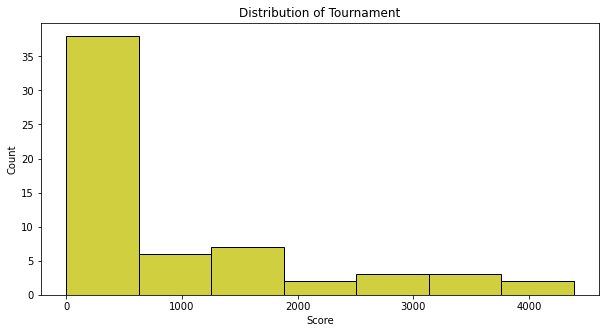

In [13]:
# Distribution of Tournament
plt.figure(figsize=(10,5))
plt.title('Distribution of Tournament')
sns.histplot(gameData['Score'], color='y')

In [14]:
gameData.corr()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,RunnerUp,HighestPositionHeld
Tournament,1.000000,0.981441,0.998677,0.971954,0.989387,0.949863,0.975059,0.987828,0.589072,0.645876,-0.708071
Score,0.981441,1.000000,0.979824,0.997240,0.958452,0.880040,0.996656,0.944263,0.714280,0.764278,-0.669775
PlayedGames,0.998677,0.979824,1.000000,0.967641,0.994053,0.956503,0.970127,0.990129,0.574716,0.632921,-0.710876
WonGames,0.971954,0.997240,0.967641,1.000000,0.939844,0.852785,0.999318,0.926234,0.752204,0.797350,-0.648628
DrawnGames,0.989387,0.958452,0.994053,0.939844,1.000000,0.973156,0.942668,0.992579,0.503472,0.566269,-0.719845
LostGames,0.949863,0.880040,0.956503,0.852785,0.973156,1.000000,0.859169,0.985275,0.325462,0.393211,-0.725149
BasketScored,0.975059,0.996656,0.970127,0.999318,0.942668,0.859169,1.000000,0.931548,0.743144,0.790532,-0.649455
BasketGiven,0.987828,0.944263,0.990129,0.926234,0.992579,0.985275,0.931548,1.000000,0.471824,0.533814,-0.726610
TournamentChampion,0.589072,0.714280,0.574716,0.752204,0.503472,0.325462,0.743144,0.471824,1.000000,0.971552,-0.305397
RunnerUp,0.645876,0.764278,0.632921,0.797350,0.566269,0.393211,0.790532,0.533814,0.971552,1.000000,-0.360408
